Objectivs:

* Experiment data sciences techniques on the Kaggle's dataset

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# Libraries

In [1]:
#data manipulation
import pandas as pd
## Change settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

#data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Data

In [2]:
FOLDER = "data/"
df_train = pd.read_csv(FOLDER+"train.csv")
df_test = pd.read_csv(FOLDER+"test.csv")

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning
Always a good place to start

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# First try - No NaN
Remove columns if any NaN values

In [5]:
df_train_l = df_train.copy()
col_w_NaN = ["Id"] # the Id columns doesn't have any usefull information
for col in df_train.columns:
    if "nan" in df_train[col].astype(str).unique():
        col_w_NaN.append(col)
        
df_train_l = df_train_l.drop(col_w_NaN, axis=1)

## Data Cleaning 2nd part
Data Viz and transform everything in numerical values

In [6]:
df_train_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


<Figure size 288x576 with 0 Axes>

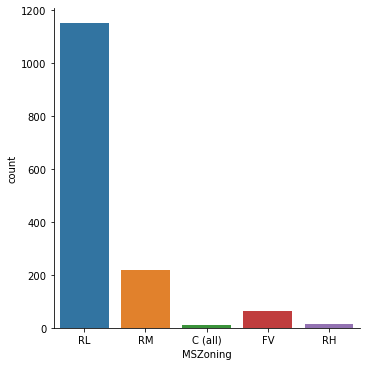

----------------------------------------
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


<Figure size 288x576 with 0 Axes>

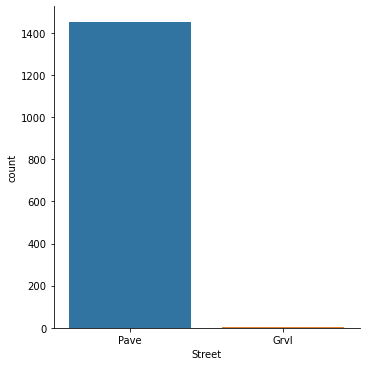

----------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


<Figure size 288x576 with 0 Axes>

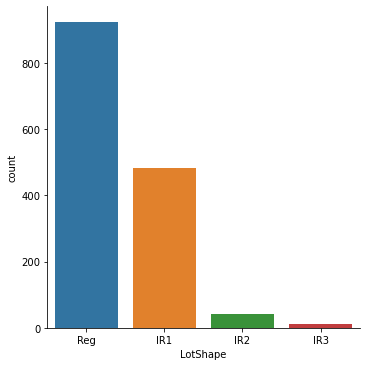

----------------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


<Figure size 288x576 with 0 Axes>

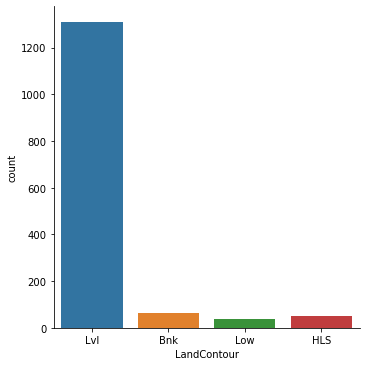

----------------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


<Figure size 288x576 with 0 Axes>

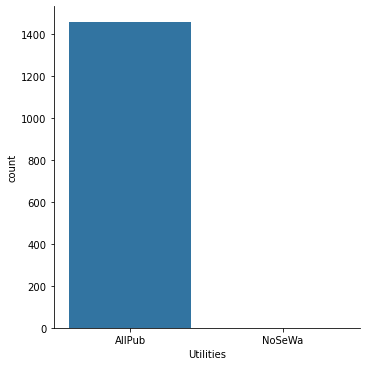

----------------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


<Figure size 288x576 with 0 Axes>

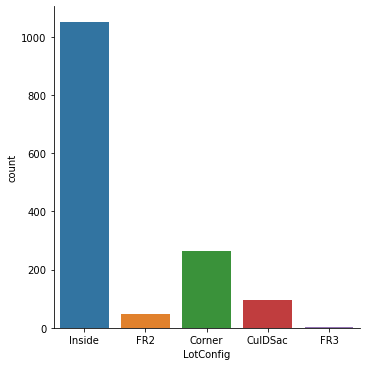

----------------------------------------
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


<Figure size 288x576 with 0 Axes>

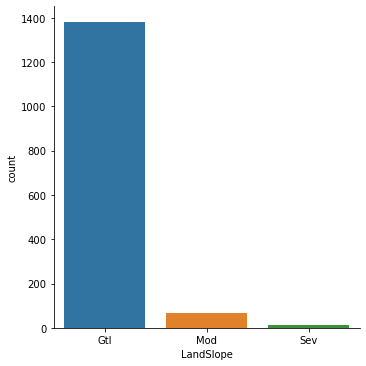

----------------------------------------
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


<Figure size 288x576 with 0 Axes>

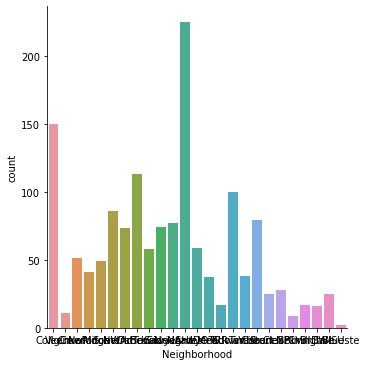

----------------------------------------
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


<Figure size 288x576 with 0 Axes>

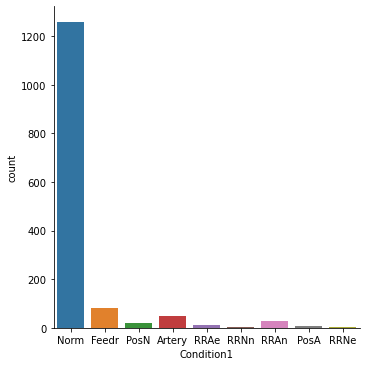

----------------------------------------
Condition2
Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64


<Figure size 288x576 with 0 Axes>

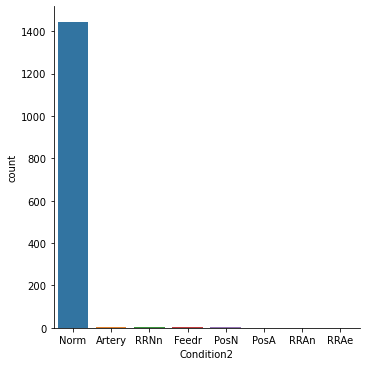

----------------------------------------
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


<Figure size 288x576 with 0 Axes>

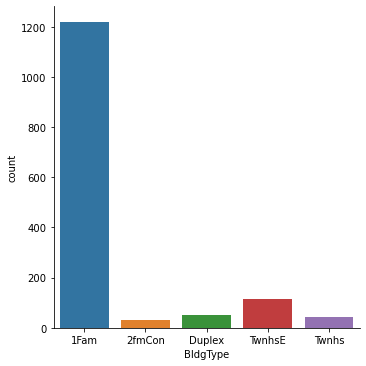

----------------------------------------
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


<Figure size 288x576 with 0 Axes>

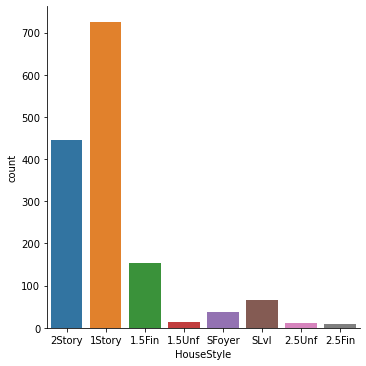

----------------------------------------
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


<Figure size 288x576 with 0 Axes>

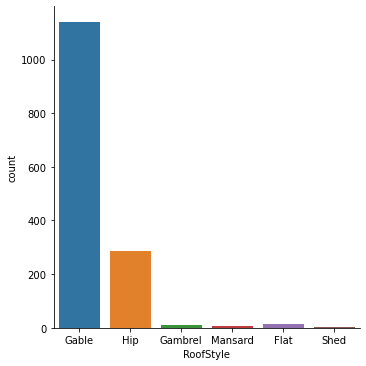

----------------------------------------
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64


<Figure size 288x576 with 0 Axes>

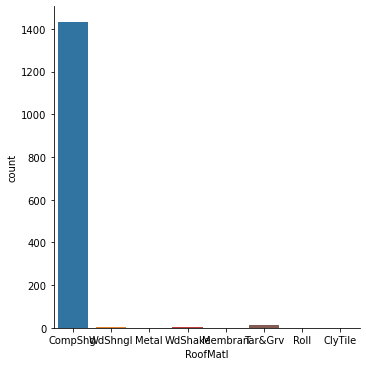

----------------------------------------
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64


<Figure size 288x576 with 0 Axes>

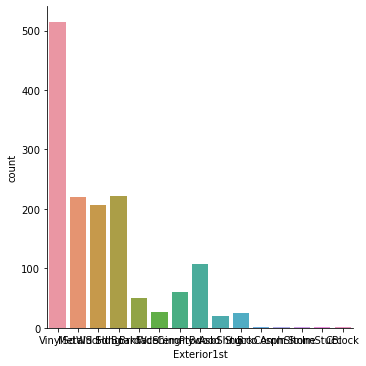

----------------------------------------
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


<Figure size 288x576 with 0 Axes>

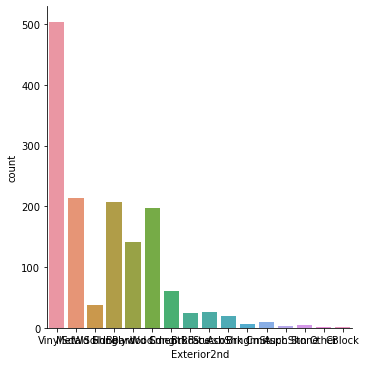

----------------------------------------
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


<Figure size 288x576 with 0 Axes>

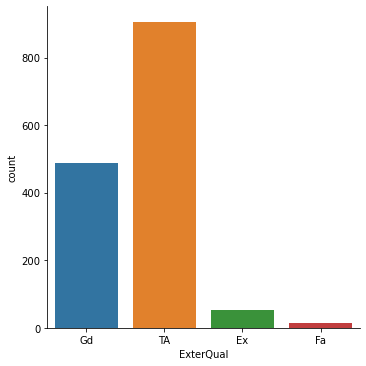

----------------------------------------
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


<Figure size 288x576 with 0 Axes>

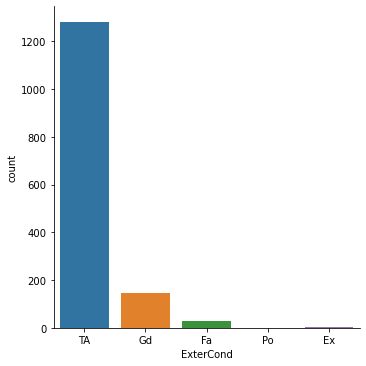

----------------------------------------
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


<Figure size 288x576 with 0 Axes>

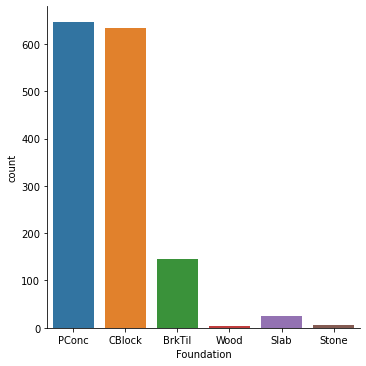

----------------------------------------
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


<Figure size 288x576 with 0 Axes>

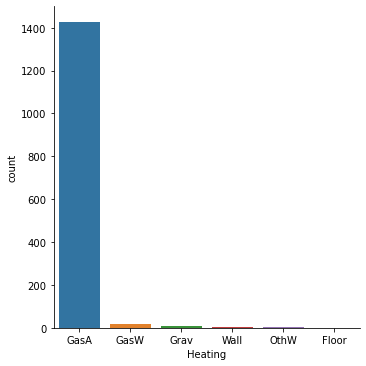

----------------------------------------
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


<Figure size 288x576 with 0 Axes>

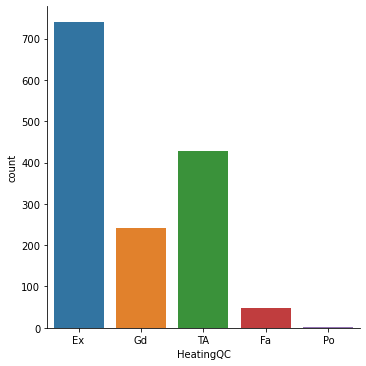

----------------------------------------
CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64


<Figure size 288x576 with 0 Axes>

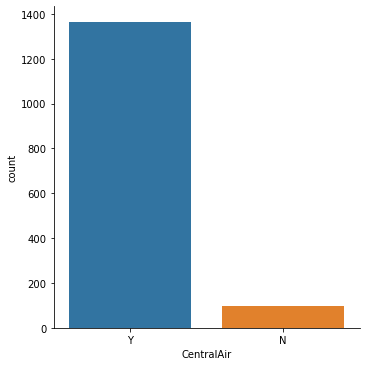

----------------------------------------
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


<Figure size 288x576 with 0 Axes>

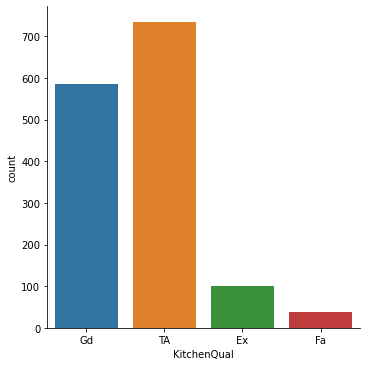

----------------------------------------
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


<Figure size 288x576 with 0 Axes>

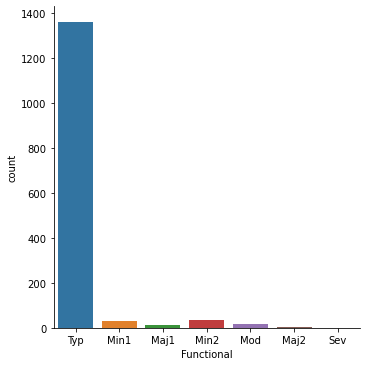

----------------------------------------
PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


<Figure size 288x576 with 0 Axes>

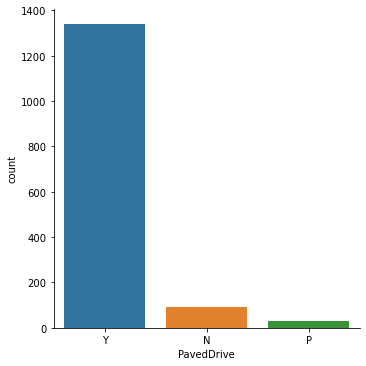

----------------------------------------
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


<Figure size 288x576 with 0 Axes>

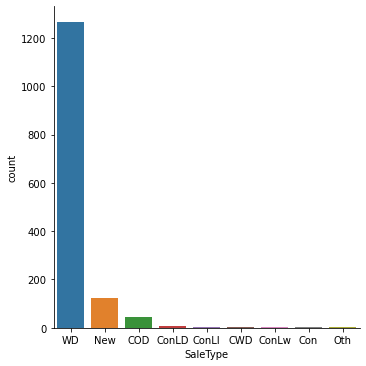

----------------------------------------
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


<Figure size 288x576 with 0 Axes>

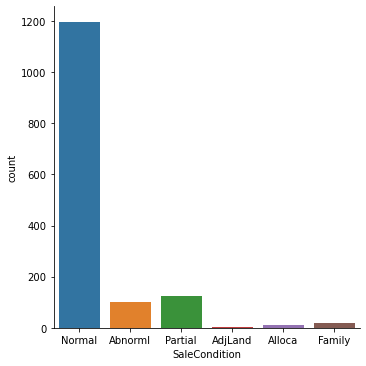

----------------------------------------


In [7]:
# Checking if only one non-numerical value on any column
for col in df_train_l.columns:
    if df_train_l[col].dtypes != "int64":
        print(col)
        print(df_train_l[col].value_counts())
        plt.figure(figsize=(4,8))
        sns.catplot(data=df_train_l, x=col, kind="count")
        plt.show()
        print("-"*40)

We can see that there is one parameters __Utilities__ which have only two values and the value NoSeWa is only used one time. Maybe it's not a good parameter to keep.

In [8]:
df_train_d = pd.get_dummies(df_train_l, prefix=["col"+str(x) for x in range(27)])
df_train_d.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,col0_C (all),col0_FV,col0_RH,col0_RL,col0_RM,col1_Grvl,col1_Pave,col2_IR1,col2_IR2,col2_IR3,col2_Reg,col3_Bnk,col3_HLS,col3_Low,col3_Lvl,col4_AllPub,...,col17_Po,col17_TA,col18_BrkTil,col18_CBlock,col18_PConc,col18_Slab,col18_Stone,col18_Wood,col19_Floor,col19_GasA,col19_GasW,col19_Grav,col19_OthW,col19_Wall,col20_Ex,col20_Fa,col20_Gd,col20_Po,col20_TA,col21_N,col21_Y,col22_Ex,col22_Fa,col22_Gd,col22_TA,col23_Maj1,col23_Maj2,col23_Min1,col23_Min2,col23_Mod,col23_Sev,col23_Typ,col24_N,col24_P,col24_Y,col25_COD,col25_CWD,col25_Con,col25_ConLD,col25_ConLI,col25_ConLw,col25_New,col25_Oth,col25_WD,col26_Abnorml,col26_AdjLand,col26_Alloca,col26_Family,col26_Normal,col26_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## First ML model

In [9]:
# split data
X = df_train_d.loc[ : , df_train_d.columns != 'SalePrice']
y = df_train_d["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

ML1 = LinearRegression().fit(X_train, y_train)
y_pred = ML1.predict(X_test)

In [10]:
mean_absolute_error(y_test, y_pred)

18873.59265434028